# Data Analysis

In [268]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# for korean plotting
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# Pandas option
pd.set_option('display.max_columns', None)

In [312]:
# data load
df = pd.read_csv('df_transformed.csv')
df = df.drop(['상권타입_골목상권','아파트_평균_시가'], axis=1)
# df['아파트_단지수'] = df['아파트_단지수'].fillna(0)
df.shape

(1460, 33)

In [313]:
# Ordered Categorical Variable
cols_crime = ['살인', '강도', '강간', '절도', '폭력', '방화', '마약', '약취', '도박', '전체범죄']

t = pd.CategoricalDtype(categories=[1,2,3,4,5], ordered=True)
df[cols_crime] = df[cols_crime].astype(t)

## Linear Models - Price as Y
with `Statsmodels` package

In [314]:
# Endog, Exog, add Constatnt
X = df.drop(['평균매매가','평균조절가'], axis=1)
X = sm.add_constant(X, prepend=True)
y = df['평균매매가']
X.shape

(1460, 32)

### OLS

In [315]:
# Model
model = sm.OLS(endog=y, exog=X, missing='drop')
# Result
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  평균매매가   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     8.418
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           3.85e-34
Time:                        15:29:09   Log-Likelihood:                -1688.6
No. Observations:                1294   AIC:                             3441.
Df Residuals:                    1262   BIC:                             3606.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2065      0.131      1.579   

### VIF

In [292]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame({'variable' : col_i, 'VIF' : variance_inflation_factor(model.exog, i)} for i, col_i in enumerate(model.exog_names) if col_i != 'const')
vif[vif.VIF>4] # 강간, 절도, 폭력

,variable,VIF
5,강간,5.142793
6,절도,7.987656
7,폭력,8.835504
12,전체범죄,20.529326


In [293]:
# corr check
df[cols_crime].astype('float').corr('kendall')

,살인,강도,강간,절도,폭력,방화,마약,약취,도박,전체범죄
살인,1.000000,0.199048,0.302555,0.322558,0.341815,0.171913,0.276643,0.104177,0.208194,0.332990
강도,0.199048,1.000000,0.319635,0.383788,0.396874,0.221154,0.257839,0.109875,0.180065,0.398743
강간,0.302555,0.319635,1.000000,0.752168,0.717243,0.304560,0.465576,0.174696,0.287585,0.795436
절도,0.322558,0.383788,0.752168,1.000000,0.724734,0.367022,0.383176,0.141062,0.329305,0.853410
폭력,0.341815,0.396874,0.717243,0.724734,1.000000,0.370680,0.427230,0.186848,0.380518,0.873011
방화,0.171913,0.221154,0.304560,0.367022,0.370680,1.000000,0.157211,0.129517,0.194057,0.371183
마약,0.276643,0.257839,0.465576,0.383176,0.427230,0.157211,1.000000,0.196359,0.245590,0.440062
약취,0.104177,0.109875,0.174696,0.141062,0.186848,0.129517,0.196359,1.000000,0.143601,0.192190
도박,0.208194,0.180065,0.287585,0.329305,0.380518,0.194057,0.245590,0.143601,1.000000,0.389317
전체범죄,0.332990,0.398743,0.795436,0.853410,0.873011,0.371183,0.440062,0.192190,0.389317,1.000000


In [294]:
X_new = X.drop(['절도','전체범죄'],axis=1)
# Model
model_new = sm.OLS(endog=y, exog=X_new, missing='drop')
# Result
res = model_new.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  평균매매가   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     11.17
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           2.17e-46
Time:                        15:20:03   Log-Likelihood:                -1657.9
No. Observations:                1294   AIC:                             3378.
Df Residuals:                    1263   BIC:                             3538.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1778      0.137     -1.302   

In [296]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame({'variable' : col_i, 'VIF' : variance_inflation_factor(model_new.exog, i)} for i, col_i in enumerate(model_new.exog_names) if col_i != 'const')
vif[vif.VIF>4]

,variable,VIF


### Influence Plot

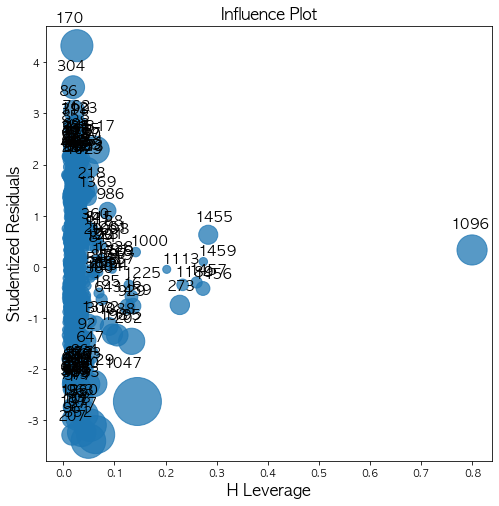

In [298]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
sm.graphics.influence_plot(res, ax=ax, alpha=0.05, criterion='cooks')
plt.show()

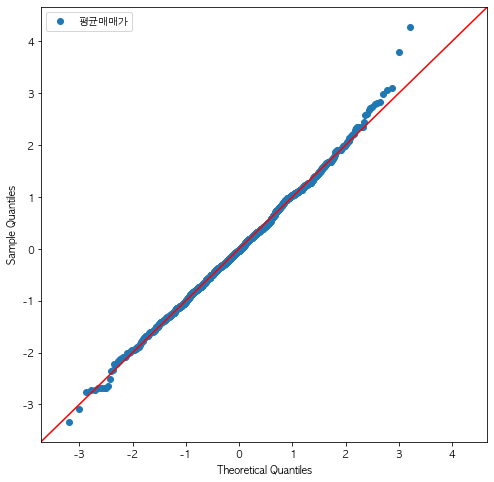

In [304]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
sm.graphics.qqplot(ax=ax, data=df['평균매매가'], line='45', label='평균매매가')
ax.legend()
plt.show()

## GLM

## Creating New Features

In [146]:
# # 매출건수당 매출금액(상권의 가격대 유추가능?)
# from copy import deepcopy

# X_add = deepcopy(X)
# X_add['건수당매출'] = X_add['매출액'] / X_add['매출건수']
# X_add = X_add.drop(['매출액', '매출건수'], axis=1)

In [149]:
# model_add = sm.OLS(endog=df['평균매매가'], exog=X_add, missing='drop')

# res_add = model_add.fit()
# # print(res_add.summary()) # Not significant Treatment

## Feature Importance & Regression 종합
Gradient Boosting Machine의 

In [171]:
# load feature importance

df_imp = pd.read_csv('featureimportance.csv')
df_imp = df_imp.set_index('0')
df_imp.index.name = None
df_imp.columns = ['Feature_Importance']

In [172]:
df_res = df_imp.join([res_new.params[1:].rename('coef'),res_new.pvalues[1:].rename('p-values')])
df_res = df_res.sort_values(by='Feature_Importance', ascending=False)

In [173]:
df_res.round(4)

,Feature_Importance,coef,p-values
생활인구_야간비율,0.1905,-0.2265,0.0000
아파트_평균_시가,0.1685,0.2713,0.0000
112신고,0.1235,-0.0065,0.7922
Subway,0.0698,0.1381,0.0000
개업율,0.0521,-0.0272,0.3432
총_생활인구,0.0498,0.0542,0.2181
생활인구_심야비율,0.0454,-0.0611,0.1723
프랜차이즈_침투율,0.0409,-0.0443,0.0970
매출액,0.0398,-0.0019,0.9599
살인,0.0376,0.0666,0.0001


In [175]:
# Feature Selection
df_res.loc[df_res['p-values']<0.1,:].round(4)

,Feature_Importance,coef,p-values
생활인구_야간비율,0.1905,-0.2265,0.0000
아파트_평균_시가,0.1685,0.2713,0.0000
Subway,0.0698,0.1381,0.0000
프랜차이즈_침투율,0.0409,-0.0443,0.0970
살인,0.0376,0.0666,0.0001
도박,0.0370,-0.0316,0.0540
아파트_단지수,0.0230,0.0631,0.0732
방화,0.0125,-0.0361,0.0362
강도,0.0119,-0.0383,0.0209
Bus,0.0117,-0.0768,0.0093


Result : Bus, Subway, 유흥업소, 강간, 절도, 폭력, 방화, 약취, 112신고, 아파트_단지수, 아파트_평균_시가, 폐업율, 매출액, 상권타입